In [34]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/occupancy.csv')
df.head()
# each row represents one point in time

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [36]:
df["date"]
# up to now this is just a string, but python does not not its a date

0        2/2/2015 14:00
1        2/2/2015 15:00
2        2/2/2015 16:00
3        2/2/2015 17:00
4        2/2/2015 18:00
             ...       
2659     5/24/2015 9:00
2660    5/24/2015 10:00
2661    5/24/2015 11:00
2662    5/24/2015 12:00
2663    5/24/2015 13:00
Name: date, Length: 2664, dtype: object

### Declaring the date variable as a datetime object

In [37]:
df['date'] = pd.to_datetime(df['date'])
df['date']
# converts string in date time object: year-month-day-hour-minute-second as default format

0      2015-02-02 14:00:00
1      2015-02-02 15:00:00
2      2015-02-02 16:00:00
3      2015-02-02 17:00:00
4      2015-02-02 18:00:00
               ...        
2659   2015-05-24 09:00:00
2660   2015-05-24 10:00:00
2661   2015-05-24 11:00:00
2662   2015-05-24 12:00:00
2663   2015-05-24 13:00:00
Name: date, Length: 2664, dtype: datetime64[ns]

In [38]:
print(pd.to_datetime("4th of July, 2015"))
print(pd.to_datetime("Nov 9 2001"))
print(pd.to_datetime("February 2nd 2019 15:32"))
# python is pretty flexible when input a date to recognize it and change it to datetime format
# regular expressions to change my input when python does not recognize my input

2015-07-04 00:00:00
2001-11-09 00:00:00
2019-02-02 15:32:00


Formatting options for datetime objects: https://strftime.org/

In [39]:
pd.to_datetime("February 2nd 2019 15:32").strftime('%B')
pd.to_datetime("February 2nd 2019 15:32").strftime('%c')
# once transfered to date object, I can call it on several ways to get information out of it 
# even if you do not necessarily see them from standart datetime output
# works bc of internal calender in python

'Sat Feb  2 15:32:00 2019'

### Setting a time index

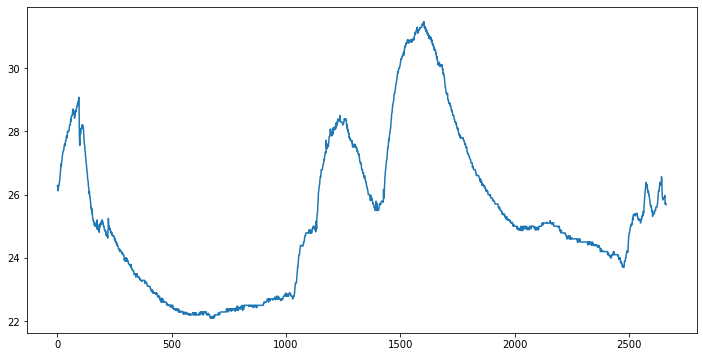

In [40]:
# resizing all of the plots: 
plt.rcParams['figure.figsize'] = (12, 6)
# Without the date index
plt.plot(df['Humidity'])
plt.show()
# before setting time index, it will always plot x against the index, but this does not have any meaning

In [41]:
# setting datetime index:
# 1. we declare date as datetime object
# 2. we set datetime as index for which we have to set frequency as an argument
df.index = pd.DatetimeIndex(df['date'], freq='H')
df.index
# df.index always a way to call index

DatetimeIndex(['2015-02-02 14:00:00', '2015-02-02 15:00:00',
               '2015-02-02 16:00:00', '2015-02-02 17:00:00',
               '2015-02-02 18:00:00', '2015-02-02 19:00:00',
               '2015-02-02 20:00:00', '2015-02-02 21:00:00',
               '2015-02-02 22:00:00', '2015-02-02 23:00:00',
               ...
               '2015-05-24 04:00:00', '2015-05-24 05:00:00',
               '2015-05-24 06:00:00', '2015-05-24 07:00:00',
               '2015-05-24 08:00:00', '2015-05-24 09:00:00',
               '2015-05-24 10:00:00', '2015-05-24 11:00:00',
               '2015-05-24 12:00:00', '2015-05-24 13:00:00'],
              dtype='datetime64[ns]', name='date', length=2664, freq='H')

In [42]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-02 14:00:00,2015-02-02 14:00:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 15:00:00,2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 16:00:00,2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 17:00:00,2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 18:00:00,2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1


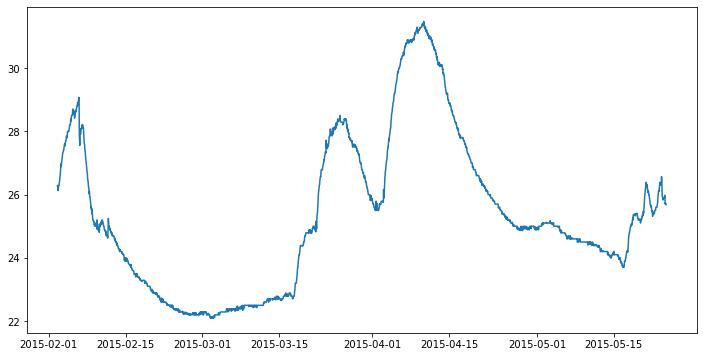

In [43]:
plt.plot(df['Humidity'])
plt.show()
# now plotting against index has a time meaning
# other advantage, when setting as datetime object, python does not treat data as categorical anymore, so you get a nicer plot
# without having every single row on y-axis, which gives you a nicer few

### Changing the frequency of the data (Resampling)

In [44]:
df['Humidity'].resample('W').mean()
# with datetime index you can resample your date on a different frequency
# like groupby but for time series
# alternative way known before: groupby on weekly component with aggregate function mean 
# Important: When resampling it at an higher frequency than originally given, you will get Null values

date
2015-02-08    27.529601
2015-02-15    24.591775
2015-02-22    23.049012
2015-03-01    22.288259
2015-03-08    22.308055
2015-03-15    22.601635
2015-03-22    24.315943
2015-03-29    27.812716
2015-04-05    26.966913
2015-04-12    30.874330
2015-04-19    28.281236
2015-04-26    25.749650
2015-05-03    24.996242
2015-05-10    24.668289
2015-05-17    24.174230
2015-05-24    25.638685
Freq: W-SUN, Name: Humidity, dtype: float64

In [45]:
help(df.resample)

Help on method resample in module pandas.core.generic:

resample(rule, axis=0, closed: Union[str, NoneType] = None, label: Union[str, NoneType] = None, convention: str = 'start', kind: Union[str, NoneType] = None, loffset=None, base: Union[int, NoneType] = None, on=None, level=None, origin: Union[str, ForwardRef('Timestamp'), datetime.datetime, numpy.datetime64, int, numpy.int64, float] = 'start_day', offset: Union[ForwardRef('Timedelta'), datetime.timedelta, numpy.timedelta64, int, numpy.int64, float, str, NoneType] = None) -> 'Resampler' method of pandas.core.frame.DataFrame instance
    Resample time-series data.
    
    Convenience method for frequency conversion and resampling of time
    series. Object must have a datetime-like index (`DatetimeIndex`,
    `PeriodIndex`, or `TimedeltaIndex`), or pass datetime-like values
    to the `on` or `level` keyword.
    
    Parameters
    ----------
    rule : DateOffset, Timedelta or str
        The offset string or object representing t

Options for resampling frequency:
    
- B       business day frequency
- C       custom business day frequency (experimental)
- D       calendar day frequency
- W       weekly frequency
- M       month end frequency
- SM      semi-month end frequency (15th and end of month)
- Q       quarter end frequency
- A       year end frequency
- H       hourly frequency
- T       minutely frequency
- S       secondly frequency
- L       milliseonds
- U       microseconds
- N       nanoseconds
- and more!

In [46]:
df['Humidity'].resample('M').mean()

date
2015-02-28    24.374582
2015-03-31    24.325819
2015-04-30    27.677441
2015-05-31    24.842351
Freq: M, Name: Humidity, dtype: float64

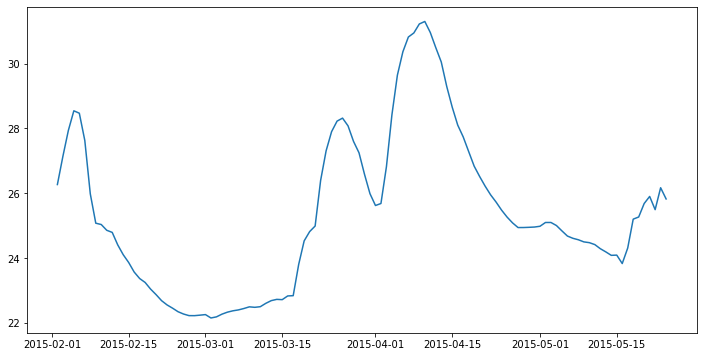

In [47]:
plt.plot(df["Humidity"].resample("D").mean())
plt.show()

## First Differencing your data

In [48]:
df['Humidity_diff'] = df['Humidity'].diff()
df.dropna(inplace = True)
df.head()
# .diff calculates the difference from one datapoint to the next
# it's called first differencing: x(t) - x(t-1)
# second differencing would be taking differences of difference variable
# first row will than create a NaN value, which can cause problems later. Therefore dropna or deleting the first row make sense

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Humidity_diff
date,,,,,,,,
2015-02-02 15:00:00,2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1,0.018
2015-02-02 16:00:00,2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1,-0.060
2015-02-02 17:00:00,2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1,-0.105
2015-02-02 18:00:00,2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1,0.075
2015-02-02 19:00:00,2015-02-02 19:00:00,23.7600,26.260,568.666667,790.000000,0.004779,1,0.060


In [49]:
help(pd.Series.diff)

Help on function diff in module pandas.core.series:

diff(self, periods: int = 1) -> 'Series'
    First discrete difference of element.
    
    Calculates the difference of a Series element compared with another
    element in the Series (default is element in previous row).
    
    Parameters
    ----------
    periods : int, default 1
        Periods to shift for calculating difference, accepts negative
        values.
    
    Returns
    -------
    Series
        First differences of the Series.
    
    See Also
    --------
    Series.pct_change: Percent change over given number of periods.
    Series.shift: Shift index by desired number of periods with an
        optional time freq.
    DataFrame.diff: First discrete difference of object.
    
    Notes
    -----
    For boolean dtypes, this uses :meth:`operator.xor` rather than
    :meth:`operator.sub`.
    The result is calculated according to current dtype in Series,
    however dtype of the result is always float64.
    


In [ ]:
# Excurse:
#long format:
jan 1st city_a
jan 2nd city_a
jan 3rd city_a
jan 1st city_b
jan 2nd city_b
jan 3rd city_b

#wide format:
jan 1st city_a city_b
jan 2nd city_a city_b
jan 3rd city_a city_b

# wide format is what you want, as for long format you always need subsetting

## Decomposing Time Series data

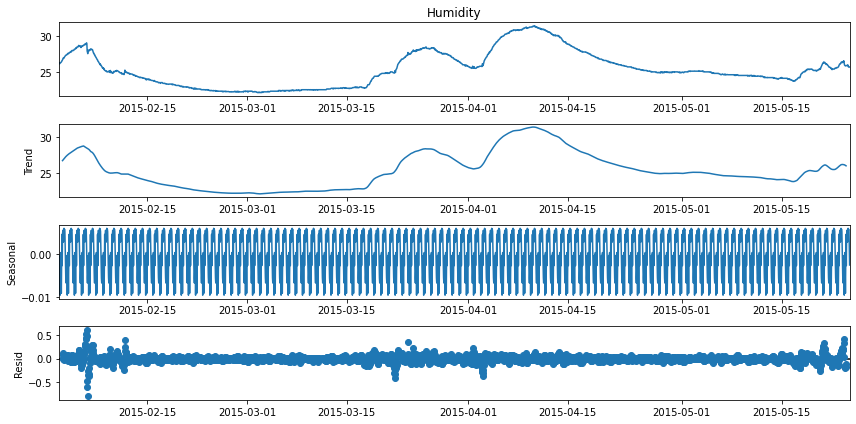

In [51]:
dec = sm.tsa.seasonal_decompose(df['Humidity'])
dec.plot()
plt.show()
# sm = statsmodels
# tsa = time-series-analysis

In [52]:
help(sm.tsa.seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.
    
    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series. Must be used if x is not a pandas object or if
        the index of x does not have  a frequency. Overrides default
        periodicity of x if x is a pandas object with a timeseries index.
    two_sided : bool, optional
        The moving a

## Checking for autocorrelation

In [53]:
help(pd.Series.autocorr)

Help on function autocorr in module pandas.core.series:

autocorr(self, lag=1) -> float
    Compute the lag-N autocorrelation.
    
    This method computes the Pearson correlation between
    the Series and its shifted self.
    
    Parameters
    ----------
    lag : int, default 1
        Number of lags to apply before performing autocorrelation.
    
    Returns
    -------
    float
        The Pearson correlation between self and self.shift(lag).
    
    See Also
    --------
    Series.corr : Compute the correlation between two Series.
    Series.shift : Shift index by desired number of periods.
    DataFrame.corr : Compute pairwise correlation of columns.
    DataFrame.corrwith : Compute pairwise correlation between rows or
        columns of two DataFrame objects.
    
    Notes
    -----
    If the Pearson correlation is not well defined return 'NaN'.
    
    Examples
    --------
    >>> s = pd.Series([0.25, 0.5, 0.2, -0.05])
    >>> s.autocorr()  # doctest: +ELLIPSIS
   

In [54]:
df['Humidity'].autocorr()
# df['Humidity'].autocorr(lag=2): gives autocorrelation between Xt and Xt-2; while default is Xt amd Xt-1
# t, t-1 and so ond depend all on my index and its frequency

0.9997365636761226

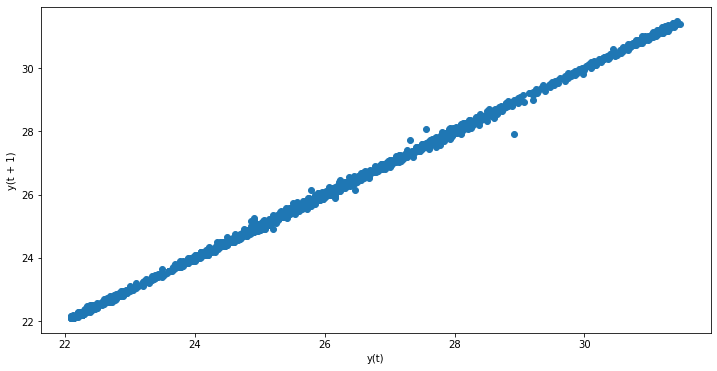

In [55]:
from pandas.plotting import lag_plot
lag_plot(df['Humidity'])
plt.show()
# lower autocorrelation causes a flatter line
# negative would go from up to down when y_t goes up
# no correlation would cause a flat line

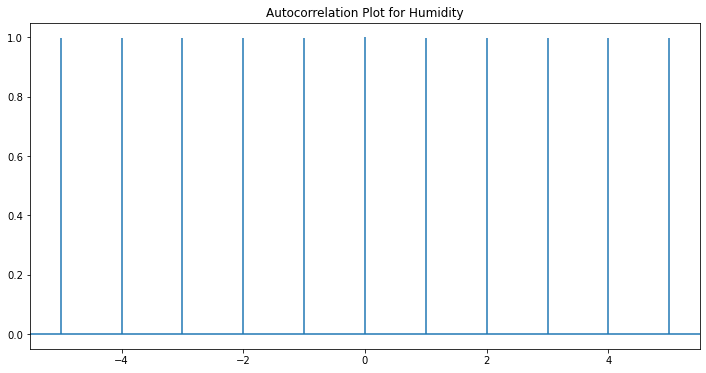

In [56]:
# Autocorrelation Plot
plt.acorr(df['Humidity'], maxlags = 5) # maxlags is ten by default
plt.title("Autocorrelation Plot for Humidity")  
plt.show()  
# shows autocorrelation at each lag
# at lag zero, its always one as its corr(X_t, X_t)
# heatmap of autocorrelation
# high autocorrelation means it is easy to forcast, because when knowing today I am able to make a good guess for tomorrow

## Applying Time Series models

In [57]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(df['Humidity'], lags = 1).fit()
model.summary()

# Log Likelihood, S.D. of innovations, AIC, BIC, HQIC to decide on optimal lag length; similar to R^2
# High coefficient value comes from high correlation
# small confidence invtervall, high z value and low p, which speaks all vof a good model
# you see from confidence intervall that true value is almost 1
# Why after specifc lag length, coefficients become insignificant? 
# Because when taking more older observations of X to predict future X,they are just less relevant 
# Typically all of the old once get insignificant at a specific time and 
# they insignificant when you go futher back in time, with just a few exceptions.
# L1 = y(t-1)

C:\Users\broth\anaconda3\envs\kittycat\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 2663
Model:                     AutoReg(1)   Log Likelihood                3898.689
Method:               Conditional MLE   S.D. of innovations              0.056
Date:                Sun, 29 Nov 2020   AIC                             -5.765
Time:                        16:42:47   BIC                             -5.758
Sample:                    02-02-2015   HQIC                            -5.762
                         - 05-24-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0071      0.011      0.624      0.533      -0.015       0.029
Humidity.L1     0.9997      0.000   2247.322      0.000       0.999       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0003           +0.0000j            1.0003            0.0000
-----------------------------------------------------------------------------
"""

In [58]:
help(AutoReg)

Help on class AutoReg in module statsmodels.tsa.ar_model:

class AutoReg(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
 |  AutoReg(endog, lags, trend='c', seasonal=False, exog=None, hold_back=None, period=None, missing='none', *, deterministic=None, old_names=None)
 |  
 |  Autoregressive AR-X(p) model.
 |  
 |  Estimate an AR-X model using Conditional Maximum Likelihood (OLS).
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  lags : {int, list[int]}
 |      The number of lags to include in the model if an integer or the
 |      list of lag indices to include.  For example, [1, 4] will only
 |      include lags 1 and 4 while lags=4 will include lags 1, 2, 3, and 4.
 |  trend : {'n', 'c', 't', 'ct'}
 |      The trend to include in the model:
 |  
 |      * 'n' - No trend.
 |      * 'c' - Constant only.
 |      * 't' - Time trend only.
 |      * 'ct' - Constant and time trend.
 |  
 |  seasonal : bool
 |   

## Making Predictions

In order to assess the accuracy of our predictions, we will remove the last ten observations from the variable which we are using to train the model. Afterwards, we will then predict those ten observations, and see how close we got with our model to what happened in reality!

In [62]:
(train, test) = df.Humidity[:-10], df.Humidity[-10:]
# Idea:
# 1. Making two sets out of my data, 
# 2. First set: all observations apart from last 10 values:
# 3. I than train the model by all values from first set and predict the last ten days(values of test set) with my model
# 4. I than compare my predictions with real observations from second data set and check performance of my model by that

model = AutoReg(train, lags = 1).fit()
model.summary()
# after training I do same AR as before with last value of my train set, to predict the future
# you see we now have 10 less observations in the model

C:\Users\broth\anaconda3\envs\kittycat\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 2653
Model:                     AutoReg(1)   Log Likelihood                3887.054
Method:               Conditional MLE   S.D. of innovations              0.056
Date:                Sun, 29 Nov 2020   AIC                             -5.767
Time:                        16:48:08   BIC                             -5.760
Sample:                    02-02-2015   HQIC                            -5.765
                         - 05-24-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0070      0.011      0.615      0.538      -0.015       0.029
Humidity.L1     0.9997      0.000   2249.726      0.000       0.999       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0003           +0.0000j            1.0003            0.0000
-----------------------------------------------------------------------------
"""

In [65]:
train.tail()

date
2015-05-23 23:00:00    25.832000
2015-05-24 00:00:00    25.840000
2015-05-24 01:00:00    25.891667
2015-05-24 02:00:00    25.890000
2015-05-24 03:00:00    25.890000
Freq: H, Name: Humidity, dtype: float64

In [66]:
test.head()

date
2015-05-24 04:00:00    25.890000
2015-05-24 05:00:00    25.912000
2015-05-24 06:00:00    25.891667
2015-05-24 07:00:00    25.978000
2015-05-24 08:00:00    25.852000
Freq: H, Name: Humidity, dtype: float64

In [63]:
pred = model.predict(start=len(train), end=len(train)+10)
pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})
# given start and end values we say, that we tant to predict 10 days ahead of my train set
# I check as close my predictions based on train set come to true values of test set

,True Values,Prediction
0,25.890000,25.889698
1,25.912000,25.889396
2,25.891667,25.889094
3,25.978000,25.888792
4,25.852000,25.888490
5,25.700000,25.888188
6,25.736000,25.887887
7,25.700000,25.887585
8,25.700000,25.887284
9,25.681667,25.886982


### Dickey Fuller Test for Stationarity

In [72]:
from statsmodels.tsa.stattools import adfuller
help(adfuller)
adfuller(df.Humidity)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {"c","ct","ctt","nc"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "nc" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if "AIC" (default) or 

(-2.1559012689082255,
 0.2226380683558838,
 23,
 2639,
 {'1%': -3.432830360798943,
  '5%': -2.8626358355986774,
  '10%': -2.5673533514279425},
 -7943.569888410115)

In [79]:
adfuller(df['Humidity'])
# second output is p value, we can not reject therefore time series is not stationary

(-2.1559012689082255,
 0.2226380683558838,
 23,
 2639,
 {'1%': -3.432830360798943,
  '5%': -2.8626358355986774,
  '10%': -2.5673533514279425},
 -7943.569888410115)

In [80]:
# On First Differences

adfuller(df['Humidity_diff'])
# second output is p value, we can reject therefore time series is stationary

(-5.919352686286081,
 2.528023157604112e-07,
 22,
 2640,
 {'1%': -3.4328294203524243,
  '5%': -2.8626354202775866,
  '10%': -2.5673531303087693},
 -7940.893776767189)

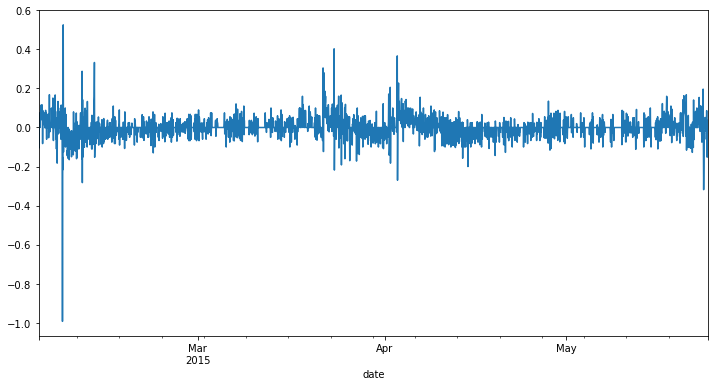

In [75]:
df['Humidity_diff'].plot()
plt.show()

## MA models

In [67]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(df['CO2'], order=(0, 1)).fit()
print(model.params)

C:\Users\broth\anaconda3\envs\kittycat\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


const        717.839682
ma.L1.CO2      0.992392
dtype: float64


In [68]:
model.summary()
# constant is now the mean
# coefficient on residual; it says if yesterday was above the mean, today is also above the mean
# difference to before in AR model where it says, if yesterday was high, also today is high

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    CO2   No. Observations:                 2663
Model:                     ARMA(0, 1)   Log Likelihood              -17080.215
Method:                       css-mle   S.D. of innovations            147.551
Date:                Sun, 29 Nov 2020   AIC                          34166.430
Time:                        18:11:09   BIC                          34184.091
Sample:                    02-02-2015   HQIC                         34172.821
                         - 05-24-2015                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        717.8397      5.696    126.031      0.000     706.676     729.003
ma.L1.CO2      0.9924      0.002    559.665      0.000       0.989       0.996
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0077           +0.0000j            1.0077            0.5000
-----------------------------------------------------------------------------
"""

In [69]:
(train, test) = df.CO2[:-10], df.CO2[-10:]

model = ARMA(df['CO2'], order=(0, 1)).fit() # order argument: first for amount of AR lags; second for amount of MA lags
pred = model.predict(start=len(train), end=len(train)+10)
pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})

# prediction seems much less accurate like AR prediction
# Why did MA not that well for that variable here? When looking at plot you see that CO2 variable does not fit to model 
# as it does not just fluctuate around its mean

C:\Users\broth\anaconda3\envs\kittycat\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


,True Values,Prediction
0,1153.250000,909.931414
1,1152.400000,959.307167
2,1146.166667,909.463518
3,1145.400000,952.742058
4,1140.800000,909.031935
5,1150.250000,947.844519
6,1129.200000,918.705317
7,1125.800000,926.732978
8,1123.000000,915.392256
9,1124.000000,923.868003


## ARMA Models

In [70]:
model = ARMA(df['CO2'], order=(2, 1)).fit()
pred = model.predict(start=len(train), end=len(train)+10)
pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})

C:\Users\broth\anaconda3\envs\kittycat\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\broth\anaconda3\envs\kittycat\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed t

,True Values,Prediction
0,1153.250000,1153.241292
1,1152.400000,1153.953164
2,1146.166667,1152.975578
3,1145.400000,1146.313864
4,1140.800000,1145.461423
5,1150.250000,1140.561138
6,1129.200000,1150.537990
7,1125.800000,1128.227529
8,1123.000000,1124.665239
9,1124.000000,1121.748316


In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    CO2   No. Observations:                 2663
Model:                     ARMA(2, 1)   Log Likelihood               -8010.442
Method:                       css-mle   S.D. of innovations              4.891
Date:                Sun, 29 Nov 2020   AIC                          16030.884
Time:                        18:28:26   BIC                          16060.320
Sample:                    02-02-2015   HQIC                         16041.537
                         - 05-24-2015                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.4169     87.216      7.859      0.000     514.477     856.356
ar.L1.CO2      1.9917      0.000   4076.341      0.000       1.991       1.993
ar.L2.CO2     -0.9918      0.000  -2030.290      0.000      -0.993      -0.991
ma.L1.CO2     -0.9343      0.007   -137.664      0.000      -0.948      -0.921
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0041           -0.0073j            1.0041           -0.0012
AR.2            1.0041           +0.0073j            1.0041            0.0012
MA.1            1.0703           +0.0000j            1.0703            0.0000
-----------------------------------------------------------------------------
"""

## Extra Pointer

For those who are especially interested in time series:

There is a further class of models called ARIMA models - this stands for Autoregressive Integrated Moving Average

The 'integrated' here refers to the number of times needed to difference a series in order to achieve stationarity.
So an ARMA model is equivalent to an ARIMA model of the same MA and AR orders with no differencing.

ARMA(p,q) is equivalent to ARIMA(p,0,q)


In [ ]:
# Example:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Humidity'] ,order=(1,0,5)).fit()
model.summary()